**REPRESENTATION OF SINGLE QUBIT ROTATION IN BLOCH SPHERE**

**θ = 0 --> State is towards North pole**

**θ = π --> State is towards South pole**

**θ = π/2, ϕ = 0 --> on X-axis**

**θ = π/2, ϕ = π/2 --> on Y-axis**

In [1]:
%matplotlib inline

**IBM QISKIT CODE**

In [2]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=566e96427bb5d4e4604a77cc55eeee05591253b82cc8c7450b26ef94fc05c115
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [3]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
from IPython.display import display
import numpy as np

Quantum Circuit:


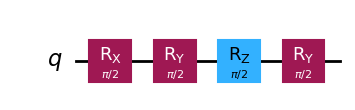

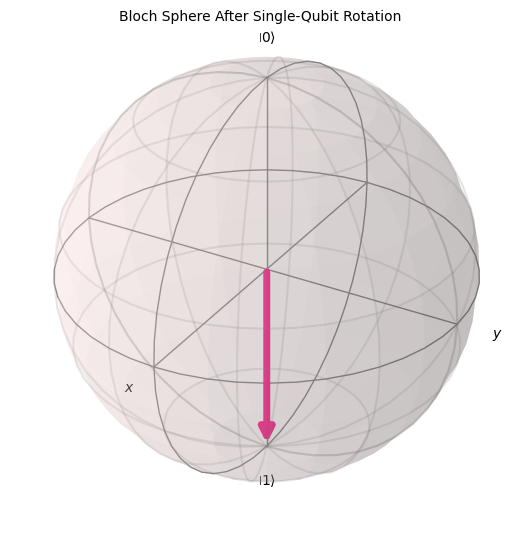

In [4]:
qc = QuantumCircuit(1)

qc.rx(np.pi / 2, 0)   # Rotate around X-axis by 90°
qc.ry(np.pi / 2, 0)   # Rotate around Y-axis by 90°
qc.rz(np.pi / 2, 0)   # Rotate around Z-axis by 90°
qc.ry(np.pi / 2, 0)
print("Quantum Circuit:")
display(qc.draw(output='mpl'))

state = Statevector.from_instruction(qc)
amplitudes = state.data
a = amplitudes[0]
b = amplitudes[1]
x = 2 * (a.conjugate() * b).real
y = 2 * (a.conjugate() * b).imag
z = abs(a)**2 - abs(b)**2

bloch_vector = [x, y, z]

plot_bloch_vector(bloch_vector, title="Bloch Sphere After Single-Qubit Rotation")


**EACH AND EVERY ROTATION OF A QUBIT REPRESENTATION USING BLOCH SPHERE**

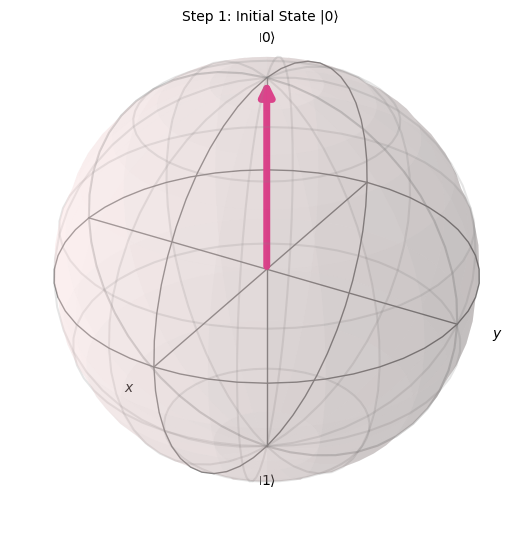

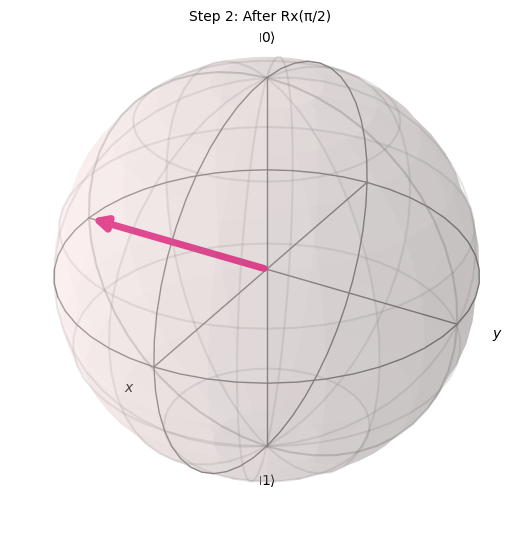

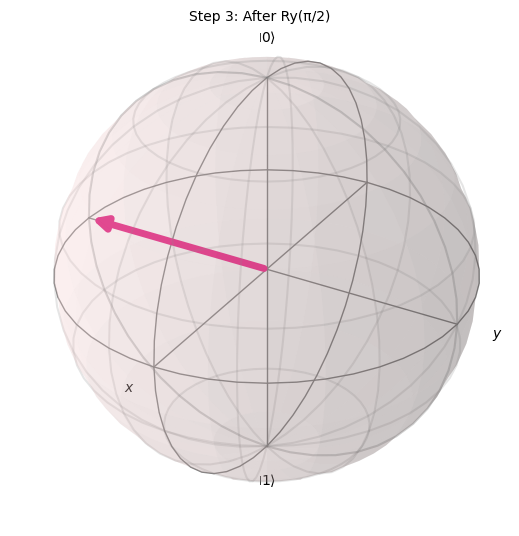

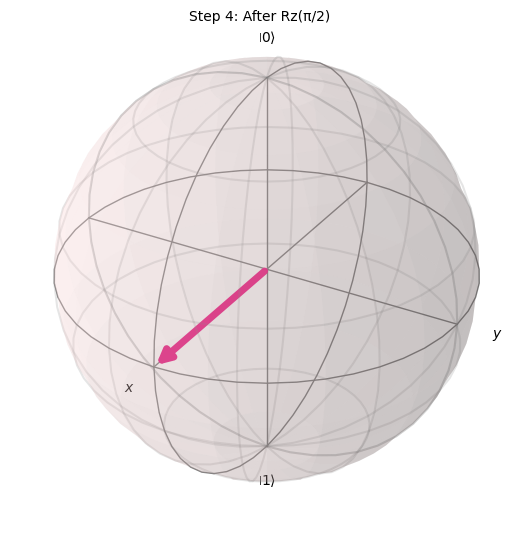

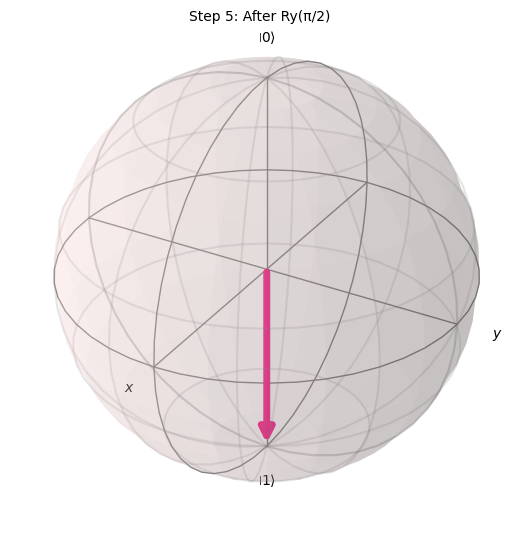

In [5]:
# Bloch vector function
def get_bloch_vector(qc):
    state = Statevector.from_instruction(qc)
    a = state.data[0]
    b = state.data[1]
    x = 2 * (a.conjugate() * b).real
    y = 2 * (a.conjugate() * b).imag
    z = abs(a)**2 - abs(b)**2
    return [x, y, z]

# 1. Initial state |0⟩
qc0 = QuantumCircuit(1)
bloch_vec0 = get_bloch_vector(qc0)
display(plot_bloch_vector(bloch_vec0, title="Step 1: Initial State |0⟩"))

qc1 = QuantumCircuit(1)
qc1.rx(np.pi/2, 0)
bloch_vec1 = get_bloch_vector(qc1)
display(plot_bloch_vector(bloch_vec1, title="Step 2: After Rx(π/2)"))

qc2 = QuantumCircuit(1)
qc2.rx(np.pi/2, 0)
qc2.ry(np.pi/2, 0)
bloch_vec2 = get_bloch_vector(qc2)
display(plot_bloch_vector(bloch_vec2, title="Step 3: After Ry(π/2)"))

qc3 = QuantumCircuit(1)
qc3.rx(np.pi/2, 0)
qc3.ry(np.pi/2, 0)
qc3.rz(np.pi/2, 0)
bloch_vec3 = get_bloch_vector(qc3)
display(plot_bloch_vector(bloch_vec3, title="Step 4: After Rz(π/2)"))

qc4 = QuantumCircuit(1)
qc4.rx(np.pi/2, 0)
qc4.ry(np.pi/2, 0)
qc4.rz(np.pi/2, 0)
qc4.ry(np.pi/2, 0)
bloch_vec4 = get_bloch_vector(qc4)
display(plot_bloch_vector(bloch_vec4, title="Step 5: After Ry(π/2)"))


**PENNYLANE CODE**

In [6]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 99.7 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


Bloch Vector: [np.float64(0.9999999999999998), np.float64(0.0), np.float64(0.0)]


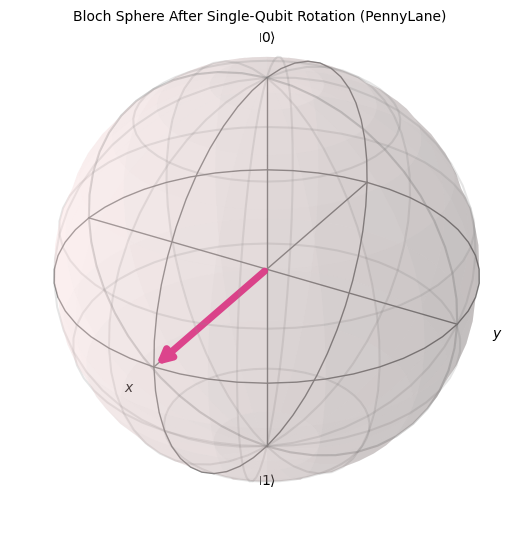

In [7]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 2, wires=0)
    qml.RY(np.pi / 2, wires=0)
    qml.RZ(np.pi / 2, wires=0)
    return qml.state()

# Get statevector
state = circuit()

# Extract amplitudes
a, b = state[0], state[1]
x = 2 * np.real(np.conj(a) * b)
y = 2 * np.imag(np.conj(a) * b)
z = np.abs(a)**2 - np.abs(b)**2
bloch_vector = [x, y, z]

print("Bloch Vector:", bloch_vector)

from mpl_toolkits.mplot3d import Axes3D
from qiskit.visualization import plot_bloch_vector  # We reuse this function
bloch_fig = plot_bloch_vector(bloch_vector, title="Bloch Sphere After Single-Qubit Rotation (PennyLane)")
display(bloch_fig)


**GOOGLE CIRQ CODE**

In [8]:
!pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 77.4 MB/s eta 0:00:00


Cirq Circuit:
0: ───Rx(0.5π)───Ry(0.5π)───Rz(0.5π)───


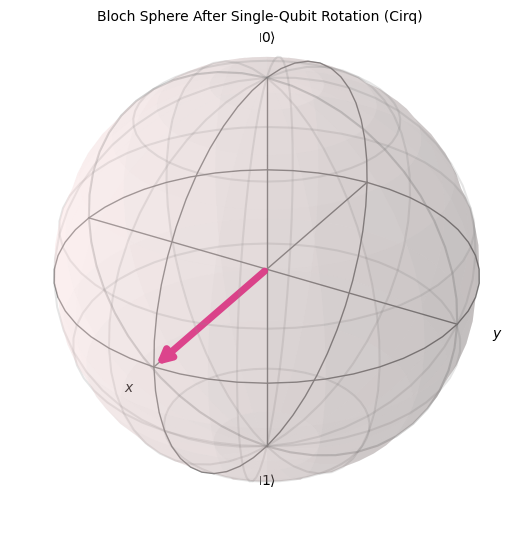

In [9]:
import cirq
import numpy as np
from matplotlib import pyplot as plt
from qiskit.visualization import plot_bloch_vector

qubit = cirq.LineQubit(0)
circuit = cirq.Circuit(
    cirq.rx(np.pi / 2)(qubit),
    cirq.ry(np.pi / 2)(qubit),
    cirq.rz(np.pi / 2)(qubit)
)

print("Cirq Circuit:")
print(circuit)

simulator = cirq.Simulator()
result = simulator.simulate(circuit)
state_vector = result.final_state_vector

a, b = state_vector[0], state_vector[1]
x = 2 * np.real(np.conj(a) * b)
y = 2 * np.imag(np.conj(a) * b)
z = np.abs(a)**2 - np.abs(b)**2
bloch_vector = [x, y, z]

bloch_fig = plot_bloch_vector(bloch_vector, title="Bloch Sphere After Single-Qubit Rotation (Cirq)")
display(bloch_fig)